Computational Carpentry Project of Group 14 (Alyssa Martinelli, Arnau Casalprim and Chloé Eggli)

Part A

In [23]:
# We import all libraires we need to carry out the project. The downloaded libraries are pandas, matplotlib and numpy and some functions of the matplotlib.ticker library.

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy as np

In [24]:
1. 
# We load the data contained in the csv file and store it under the name data.
data = pd.read_csv('4-Molecules.csv')


2. 
The dataset is a table. Each row of the table describes a different molecule and each column describes its properties.
The properties are :
Molecule (smiles notation),
Molecule name,
Mannhold LogP,
Atomic Polarizabilities,
Aromatic Atoms Count,
Aromatic Bonds Count,
Element Count,
Bond Polarizabilities,
Bond Count,
Eccentric Connectivity Index,
Fragment Complexity,
VABC Volume Descriptor,
Hydrogen Bond Acceptors,
Hydrogen Bond Donors,
Largest Chain,
Largest Pi Chain,
Petitjean Number,
Rotatable Bonds Count,
Lipinski's Rule of Five,
Topological Polar Surface Area,
Vertex adjacency information magnitude,
Molecular Weight,
XLogP,
Zagreb Index,
Molecular Formula,
Formal Charge,
Formal Charge (pos),
Formal Charge (neg),
Heavy Atoms Count,
Molar Mass,
SP3 Character,
Rotatable Bonds Count (non-terminal).
 

In [25]:
3. 
# We find what are the datatypes related to each column in the dataframe.
data_types = data.dtypes

print("The data types of each column are:")
print(data_types)

The data types of each column are:
row ID                                     object
Molecule                                   object
Molecule name                              object
Mannhold LogP                             float64
Atomic Polarizabilities                    object
Aromatic Atoms Count                        int64
Aromatic Bonds Count                        int64
Element Count                               int64
Bond Polarizabilities                      object
Bond Count                                  int64
Eccentric Connectivity Index                int64
Fragment Complexity                       float64
VABC Volume Descriptor                     object
Hydrogen Bond Acceptors                     int64
Hydrogen Bond Donors                        int64
Largest Chain                               int64
Largest Pi Chain                            int64
Petitjean Number                          float64
Rotatable Bonds Count                       int64
Lipinski's Rule

In [26]:
4.
# We determine how many rows and columns the data table has. 
rows, columns = data.shape

print(f"The 4-Molecules.csv file has {rows} rows and {columns} columns.")

The 4-Molecules.csv file has 15166 rows and 33 columns.


In [27]:
5. 
# We are checking if there is any missing data in the dataframe by searching if there are "NaN" values.
missing_data = data.isnull().any().any()

# If it's the case, then we search how many missing values there are in the dataframe, first for each column, then in total.
if missing_data:    

# We are counting the number of missing values for each column.
    missing_values = data.isnull().sum()

#  We are counting the total number of missing values.
    total_missing_values = data.isnull().sum().sum()

    print("Number of missing values in each column:")
    print(missing_values)
    print(f"\nTotal number of missing values in the CSV file: {total_missing_values}")

Part B

In [28]:
high_values = data[((data['Mannhold LogP']) > -2) & ((data['Mannhold LogP']) < 3) & ((data['Molecular Weight']) < "8000.0") & ((data['Molecular Weight']) > "4500")]
print(high_values)
#we try to look at the values that are "weird", that do not follow the trend

         row ID                                           Molecule  \
3          Row3  P(=O)(OP(=O)(OC[C@H]1O[C@@H](n2c3ncnc(c3nc2)N)...   
11        Row11  O1[C@@H](O[C@@H](C#N)c2ccccc2)[C@H](O)[C@@H](O...   
12        Row12  O1[C@@H](OC(C#N)c2ccccc2)[C@H](O)[C@@H](O)[C@@...   
14        Row14                                         O=C(O)[O-]   
18        Row18                                      O=C([O-])[O-]   
...         ...                                                ...   
15011  Row15012  ClC=1C(Cl)=C(Cl)C(C1Cl)(Cl)C2(Cl)C(Cl)=C(Cl)C(...   
15067  Row15068  BrC=1C(=O)C=C2[C@H](F)C[C@@H]3[C@]([C@]2(C1)C)...   
15159  Row15160                                    [Na].C(CC)[CH2]   
15164  Row15165                                            [AsH4+]   
15165  Row15166  P(=O)(OCC1OC(n2c3ncnc(c3nc2)NC(=O)NCC)C4C1OC(/...   

       Molecule name  Mannhold LogP Atomic Polarizabilities  \
3      C10H16N5O13P3           0.25               55.084688   
11        C20H27NO11           2.

In [29]:
hydrophilic_molecules_high_BA = data[((data['Mannhold LogP']) < 0) & (data['Hydrogen Bond Acceptors'] >= data['Hydrogen Bond Acceptors'].mean()) ]

hydrophobic_molecules_high_BA = data[((data['Mannhold LogP']) > 1 ) & (data['Hydrogen Bond Acceptors'] >= data['Hydrogen Bond Acceptors'].mean()) ]


`The subsets` are made with regards to two kind of values, the Mannhold LogP which is an indicator of hydrophilicity of a molecule. For a value lower than 0, the molecule is hydrophilic. The hydophobicity increase as the Mannhold LogP increase. The idea here is to see if there is a correlation between the Hydrogen bond acceptor and the hydrophobicity of the molecule.

In [30]:
min_hydrophile = min(hydrophilic_molecules_high_BA['Hydrogen Bond Acceptors'])
max_hydrophile = max(hydrophilic_molecules_high_BA['Hydrogen Bond Acceptors'])
average_hydrophile = hydrophilic_molecules_high_BA['Hydrogen Bond Acceptors'].mean()
standard_deviation = hydrophilic_molecules_high_BA['Hydrogen Bond Acceptors'].std()
min_hydrophobe = min(hydrophobic_molecules_high_BA['Hydrogen Bond Acceptors'])
max_hydrophobe = max(hydrophobic_molecules_high_BA['Hydrogen Bond Acceptors'])
standard_deviation_2 = hydrophobic_molecules_high_BA['Hydrogen Bond Acceptors'].std()
average_hydrophobe = hydrophobic_molecules_high_BA['Hydrogen Bond Acceptors'].mean()

print(min_hydrophile)
print(min_hydrophobe)

print(max_hydrophile)
print(max_hydrophobe)

print(average_hydrophile)
print(average_hydrophobe)

print(standard_deviation)
print(standard_deviation_2)


4
4
137
229
23.886363636363637
7.87012987012987
29.339405923735352
9.40322756334797


`Hydrophobic`
The minimum value for the hydrophobic molecules is 4 and the maximal value is 229. The average value is 7 and the standard deviation is 9. The average value is way smaller than the maximal value, but since the standard deviation is relatively low, this means that the maximal value should be an extreme and is not representative of the ensemble of values.


`Hydrophilic`
The minimum value for the hydrophilic molecules is 4 and the maximal value is 137. The average value is 23 and the standard deviation is 29. Once again, the average value is quite low but at the same time the standard deviation is a bit higher. In this subset, there is more varaity of values.

`Conclusion`
To conclude, there is no net correlation with the affinity for water and the hydrogen bond acceptor. It does not mean that there is no correlation but it can not be prove with this set of data. However, we still see that the number of hydrogen bond acceptor is higher for hydrophilic molecules.

Part C

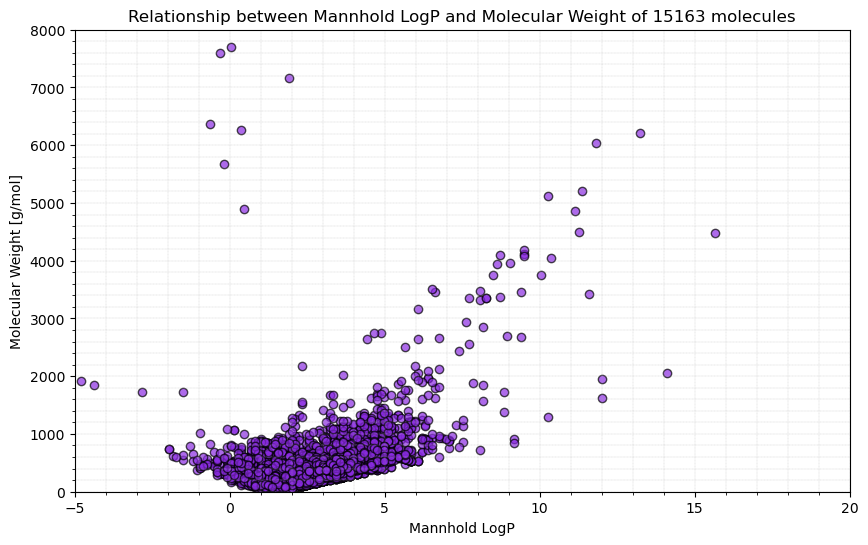

Pearson's correlation coefficient : 0.52


In [31]:

# clean the data
data['Mannhold LogP'] = pd.to_numeric(data['Mannhold LogP'], errors='coerce')
data['Molecular Weight'] = pd.to_numeric(data['Molecular Weight'], errors='coerce')

# Delete rows with missing values
data = data.dropna()

# Create the scatter plot with Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(data['Mannhold LogP'], data['Molecular Weight'], alpha=0.7, color='blueviolet', edgecolor='k')

# addition of a titile to the graphe and labeled the X-axis and the Y-axis
plt.xlabel('Mannhold LogP')
plt.ylabel('Molecular Weight [g/mol]')
plt.title(f'Relationship between Mannhold LogP and Molecular Weight of {len(data)} molecules')

# addition of grid on the graph for better readability
plt.grid(which='both', linestyle='--', linewidth='0.2')

# Define limits for the X and Y axes
plt.xlim(-5, 20)
plt.ylim(-0.5, 8000)

# addition of ticks on the axes for better readability
plt.minorticks_on()

plt.show()



# Calculate Pearson's correlation coefficient
correlation = data['Mannhold LogP'].corr(data['Molecular Weight'])

print(f"Pearson's correlation coefficient : {correlation:.2f}")





 `Mannhold LogP` is a logarithm of the octanol-water partition coefficient (logarithm of the ratio of the concentrations of the molecule in octanol and water). This is a measure of the lipophilicity or hydrophobicity of the molecule. The higher the LogP, the more hydrophobic the molecule is.

`Molecular Weight` is the mass of a mole of molecule calculated as the sum of the atomic masses of the atoms in the molecular formula of the molecule.

If the Pearson correlation coefficient is 0.52, this indicates a moderate positive correlation between the variables `Mannhold LogP` and `Molecular Weight`. There is therefore a general trend that as the `Mannhold LogP` increases, the `Molecular Weight` also tends to increase. However, the relationship is not perfectly linear. Furthermore, the correlation is neither very weak nor very strong. This suggests that although there is a tendency for molecules with higher Mannhold LogP to have higher molecular weight, there is also significant variation that is not explained solely by this relationship.

To conclude, a correlation coefficient of 0.52 shows that there is a moderate and positive relationship between `Mannhold LogP` and `Molecular Weight`. Although there is a general trend, it is important to consider other variables and factors that may influence molecular weight and examine the data in more detail to obtain a complete understanding.

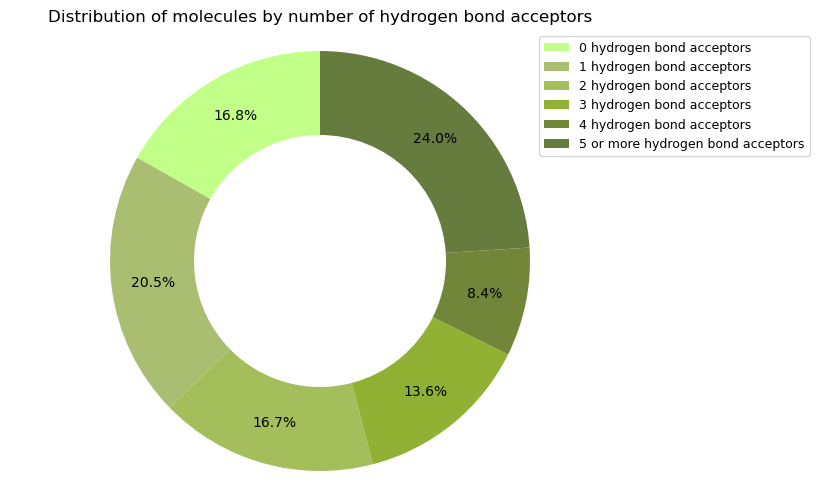

In [32]:
# clean the data
data['Hydrogen Bond Acceptors'] = pd.to_numeric(data['Hydrogen Bond Acceptors'], errors='coerce')

# Delete rows with missing values
data = data.dropna()

# Create categories for hydrogen bond acceptors
data['Hydrogen Bond Acceptors Category'] = pd.cut(data['Hydrogen Bond Acceptors'], bins=[0, 1, 2, 3, 4, 5, 100], labels=['0', '1', '2', '3', '4', '5+'])

# Count the number of molecules in each category
counts = data['Hydrogen Bond Acceptors Category'].value_counts(sort=False)

# Create the pie chart
plt.figure(figsize=(8, 6), facecolor='white')
plt.pie(counts, labels=None, autopct='%1.1f%%', startangle=90, colors=['#c2ff89','#a9be70','#a4be5c','#90b134', '#728639','#667c3e'],
        wedgeprops={'width': 0.4}, pctdistance=0.8) 

# adding a title to the chart
plt.title('Distribution of molecules by number of hydrogen bond acceptors')

# Ensures the graph is circular
plt.axis('equal') 

# adding legends to the graph
plt.legend( loc = 'upper right',fontsize="9", labels=["0 hydrogen bond acceptors", "1 hydrogen bond acceptors", "2 hydrogen bond acceptors", "3 hydrogen bond acceptors", "4 hydrogen bond acceptors", "5 or more hydrogen bond acceptors"], bbox_to_anchor=(1,0,0.3,1))

plt.show()






The pie chart shows the distribution of molecules based on the number of hydrogen bond acceptors. Categories include molecules with 0 to 4 acceptors and a separate category for those with 5 or more acceptors. We can observe in the graph that a majority of molecules have 1 to 3 hydrogen bond acceptors. This means that most molecules in the data set have an intermediate ability to form hydrogen bonds. Molecules with 0 hydrogen bond acceptors, which represents about 18% of the data, could have greater hydrophobic interactions making them less soluble in water. In contrast, molecules with 5 or more hydrogen bond acceptors are likely more hydrophilic and might have better bioavailability in aqueous environments.